In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
fake_bill = pd.read_csv("fake_bill.csv")
fake_bill
#label - is_genuine

Saving fake_bill.csv to fake_bill (1).csv


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
fake_bill["margin_low"].fillna(fake_bill["margin_low"].mean(),inplace=True)

In [ ]:
fake_bill.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length,True
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850,0.666667
std,0.305195,0.299462,0.325627,0.655569,0.231813,0.87273,0.471562
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000,0.000000
25%,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000,0.000000
50%,171.960000,104.040000,103.920000,4.330000,3.140000,112.96000,1.000000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000,1.000000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000,1.000000


In [ ]:
fake_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


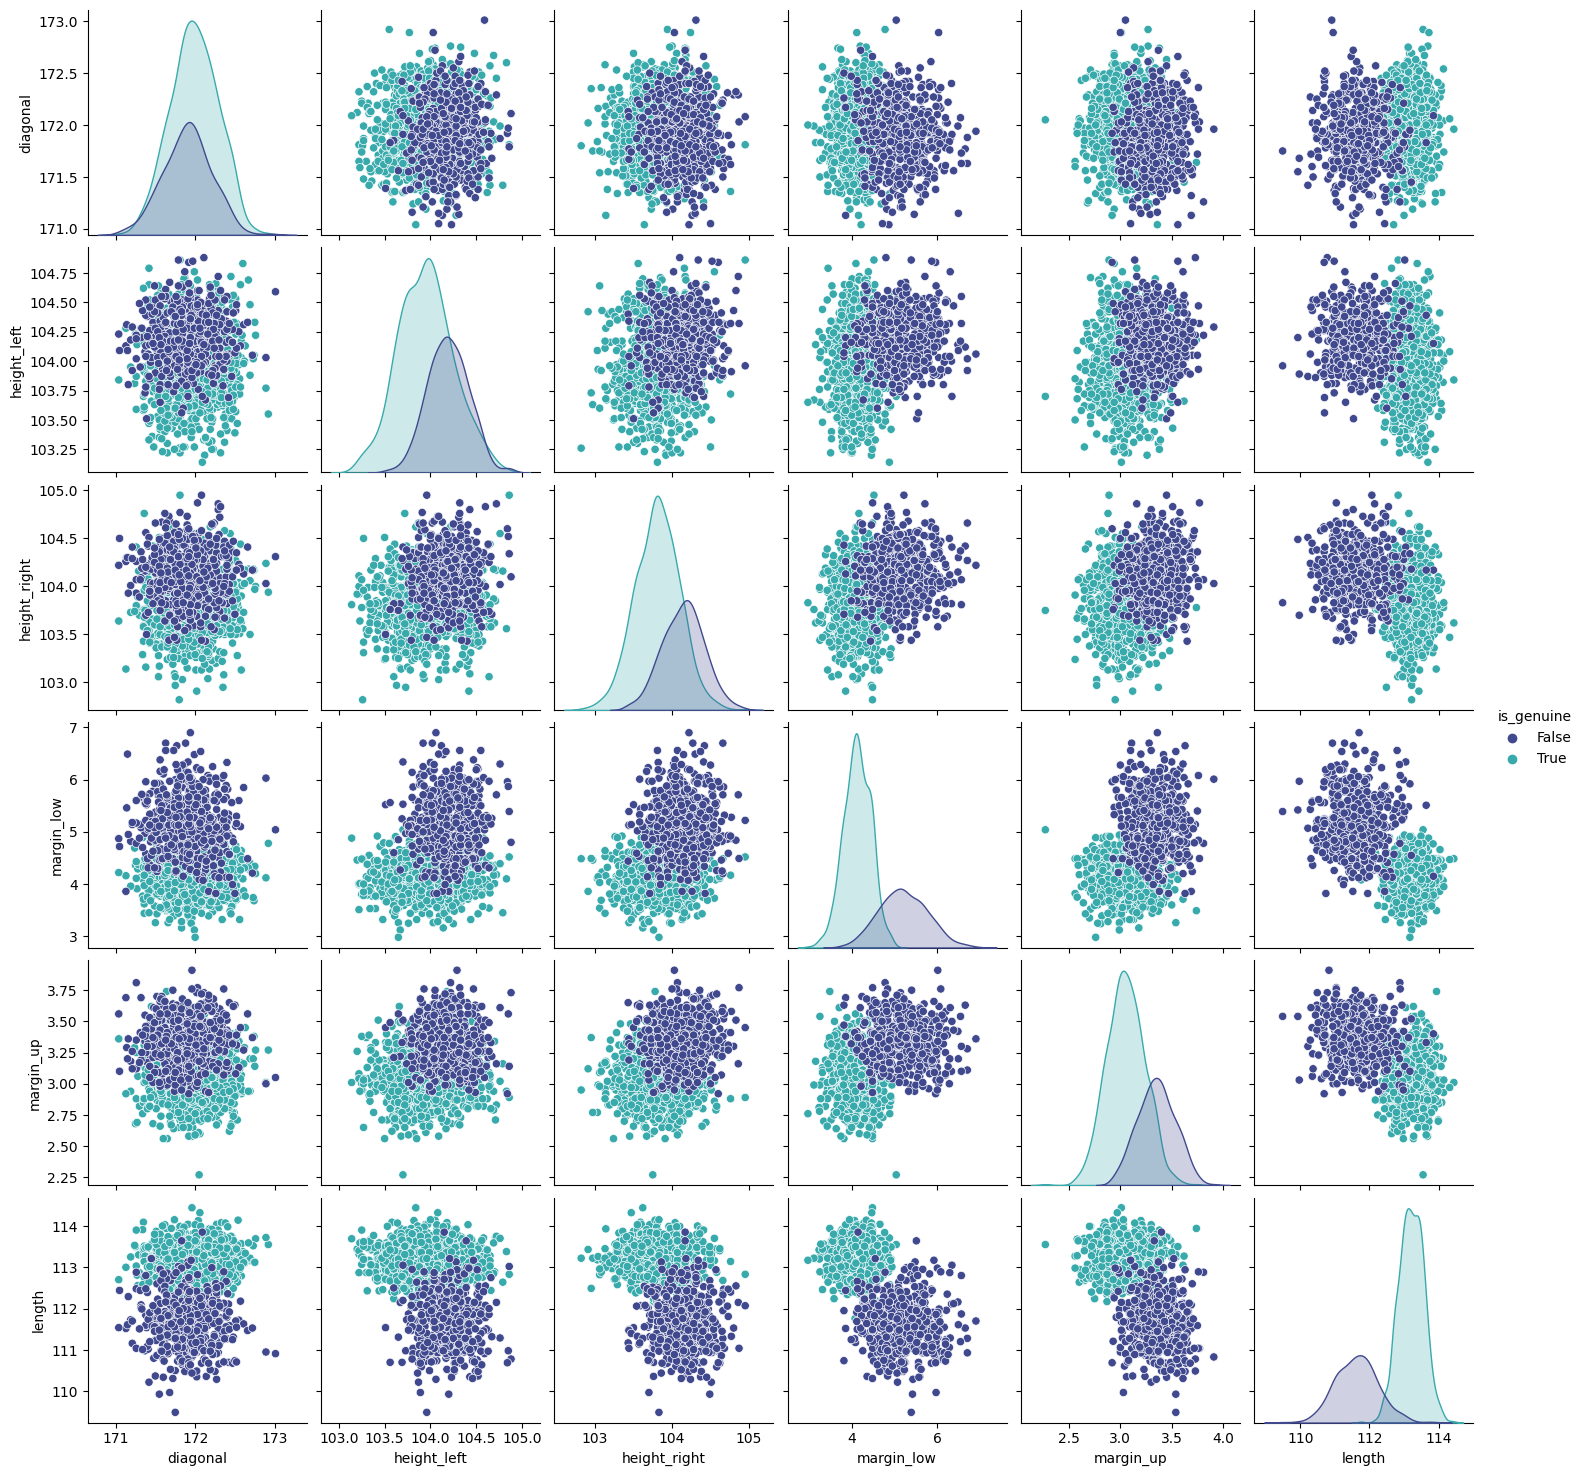

In [ ]:
sns.pairplot(fake_bill,hue="is_genuine",palette="mako")

In [ ]:
#dummy for label
label = pd.get_dummies(fake_bill["is_genuine"],drop_first=True)

In [ ]:
fake_bill = pd.concat([fake_bill,label],axis=1)

In [ ]:
fake_bill.drop("is_genuine",axis=1,inplace=True)

In [ ]:
fake_bill["True"] = fake_bill[True]

In [ ]:
fake_bill.drop(True,axis=1,inplace=True)

In [ ]:
fake_bill.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,True
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,172.69,104.48,103.50,4.40,2.94,113.16,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1


In [ ]:
#standardizing data
std_sclr = StandardScaler()
std_sclr.fit(fake_bill.drop("True",axis=1))
fake_bill_ft = std_sclr.transform(fake_bill.drop("True",axis=1))

In [ ]:
#splitting data
X = fake_bill_ft
y = fake_bill["True"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#starting with value k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [ ]:
#metrics for k = 1
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       148
           1       0.99      0.97      0.98       302

    accuracy                           0.98       450
   macro avg       0.97      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[146   2]
 [  8 294]]


In [ ]:
# checking error_rate for different k value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(y_test != predictions))

Text(0, 0.5, 'error_rate')

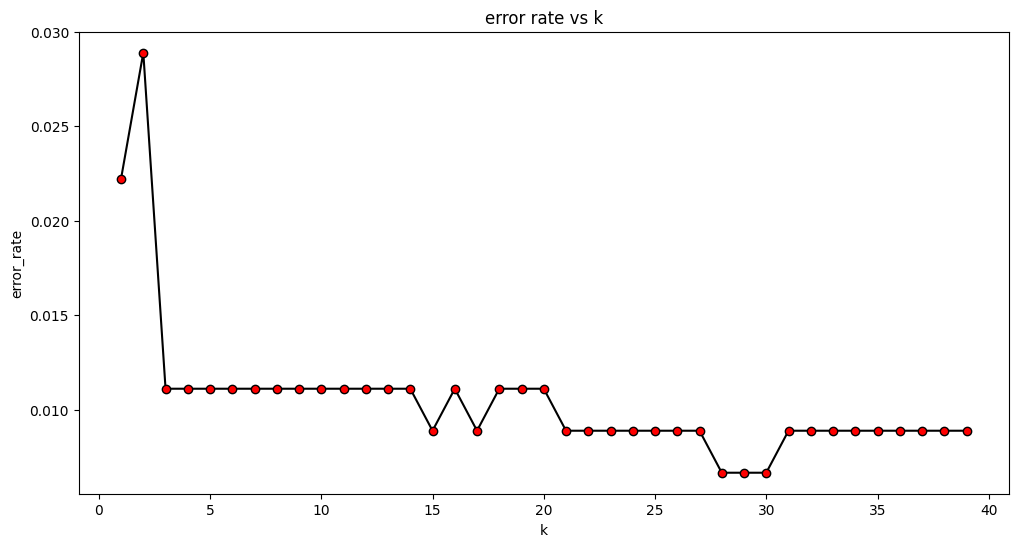

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color="black",marker="o",markerfacecolor="red",linestyle="-")
plt.title("error rate vs k")
plt.xlabel("k")
plt.ylabel("error_rate")
#min value of error rate is seen at k=28

In [ ]:
#final model for k=28
knn = KNeighborsClassifier(n_neighbors = 28)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [ ]:
#final metrics for k = 28
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       1.00      0.99      1.00       302

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

[[147   1]
 [  2 300]]
